Віршило Михайло ЕФ 4 курс

Task 1 - Завантажте датасет через read_csv (оцініть csv файл, один із варіантів розбити датафрейм на два df_1, df_2, після чого ввести категоріальну змінну region і функцією concat об’єднати їх.)

In [377]:
import pandas as pd 

df = pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv",skiprows=1)

df_1 = df.iloc[:122].copy()
df_2 = df.iloc[124:].copy()
df_1['region'] = 'Bejaia'
df_2['region'] = 'Sidi-Bel Abbes'
df_combined = pd.concat([df_1, df_2], ignore_index=True)
df_combined



,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,Bejaia
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,Bejaia
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,Bejaia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,Sidi-Bel Abbes
240,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,Sidi-Bel Abbes
241,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,Sidi-Bel Abbes
242,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,Sidi-Bel Abbes


Task 2 - Проведіть підрахунок пропущених значень в кожному стовпчику. Очистіть його від пропущених значень за наявності. Замініть відсутні значення в числових стовпцях середнім значенням, а категоріальні стовпці — найпоширенішими значеннями.

In [378]:


for column in df_combined.columns:
    if df_combined[column].dtype == 'object' or pd.api.types.is_categorical_dtype(df_combined[column]):  
        most_common = df_combined[column].mode()[0]
        df_combined[column].fillna(most_common, inplace=True)
    else:  
        mean_value = df_combined[column].mean()  
        df_combined[column].fillna(mean_value, inplace=True)

print(df_combined.isna().sum())



day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
region         0
dtype: int64


C:\Users\misha\AppData\Local\Temp\ipykernel_10784\216093448.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_combined[column].fillna(most_common, inplace=True)


Task 3 - Виведіть статистику для кожного стовпця (середнє, медіана, стандартне відхилення). Визначте стовпці з найбільшою варіацією.

In [379]:
for column in df_combined.columns:
  if column not in ['Classes', 'region']:
    df_combined[column] = pd.to_numeric(df_combined[column])
    mean_value = df_combined[column].mean()
    median_value = df_combined[column].median()
    std_value = df_combined[column].std()
    print(f"Column = {column}, Mean = {mean_value}, Median = {median_value}, Std = {std_value}")
        
std_values = df_combined.select_dtypes(include=['int64', 'float64']).std()
max_variation_column = std_values.idxmax()
print(f"Max Variation = {max_variation_column}")

Column = day, Mean = 15.754098360655737, Median = 16.0, Std = 8.825059227966499
Column = month, Mean = 7.5, Median = 7.5, Std = 1.112961422319757
Column = year, Mean = 2012.0, Median = 2012.0, Std = 0.0
Column = Temperature, Mean = 32.17213114754098, Median = 32.0, Std = 3.633843260061807
Column =  RH, Mean = 61.93852459016394, Median = 63.0, Std = 14.884200183354102
Column =  Ws, Mean = 15.504098360655737, Median = 15.0, Std = 2.810178370830235
Column = Rain , Mean = 0.760655737704918, Median = 0.0, Std = 1.9994055650382787
Column = FFMC, Mean = 77.8877049180328, Median = 83.5, Std = 14.33757088016809
Column = DMC, Mean = 14.673360655737707, Median = 11.3, Std = 12.368038731955583
Column = DC, Mean = 49.28811475409836, Median = 33.1, Std = 47.61966237795993
Column = ISI, Mean = 4.759836065573771, Median = 3.5, Std = 4.1546277402744165
Column = BUI, Mean = 16.673360655737703, Median = 12.45, Std = 14.201648435626945
Column = FWI, Mean = 7.049180327868853, Median = 4.45, Std = 7.4283656

Task 4 - Створіть індикаторну змінну стовпця Classes

In [380]:
df_combined['Classes'] = df_combined['Classes'].str.strip()
indicator_variable = pd.get_dummies(df_combined['Classes'], prefix='Class')

if 'Class_fire' in indicator_variable.columns:
    indicator_variable.rename(columns={'Class_fire': 'fire', 'Class_not fire': 'not fire'}, inplace=True)

df_combined = pd.concat([df_combined, indicator_variable], axis = 1)
df_combined.drop("Classes", axis = 1, inplace = True) 
df_combined

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region,fire,not fire
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,Bejaia,False,True
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,Bejaia,False,True
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,Bejaia,False,True
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,Bejaia,False,True
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,Bejaia,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,Sidi-Bel Abbes,True,False
240,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,Sidi-Bel Abbes,False,True
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,Sidi-Bel Abbes,False,True
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,Sidi-Bel Abbes,False,True


Task 5 - Поділіть відносну вологість на три категорії (Висока, Середня, Низька)

In [381]:
import numpy as np

df_combined[" RH"] = df_combined[" RH"].astype(int, copy=True)
bins = np.linspace(df_combined[" RH"].min(), df_combined[" RH"].max(), 4) 
labels = ['Низька', 'Середня', 'Висока']
df_combined["RH_binned"] = pd.cut(df_combined[' RH'], bins=bins, labels=labels, include_lowest=True)
print(df_combined[[" RH", "RH_binned"]].head())

    RH RH_binned
0   57   Середня
1   61   Середня
2   82    Висока
3   89    Висока
4   77    Висока


Task 6 - Побудуйте гістограму відносної вологості.


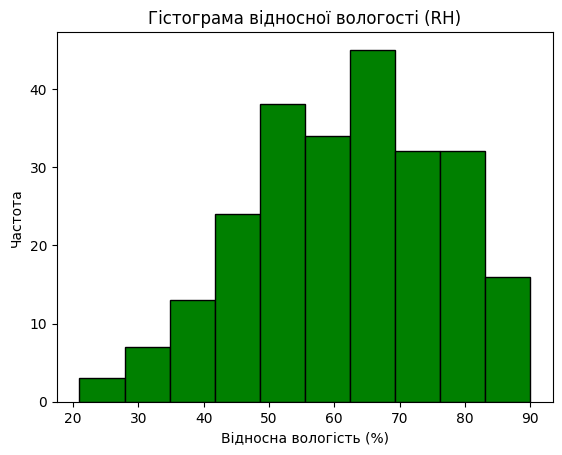

In [382]:
import matplotlib.pyplot as plt

plt.hist(df_combined[' RH'], bins=10, edgecolor='black', color='green')
plt.title('Гістограма відносної вологості (RH)')
plt.xlabel('Відносна вологість (%)')
plt.ylabel('Частота')
plt.show()